# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import json
import re
import csv

plt.rc('text', usetex=True)
plt.rc('font', family='serif',size ='16')
pd.options.display.max_rows = 4000
#matplotlib.rcParams['ps.useafm'] = True
#matplotlib.rcParams['text.usetex'] = True

# All Evolution

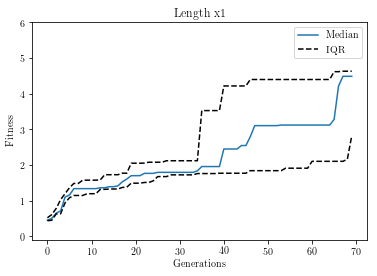

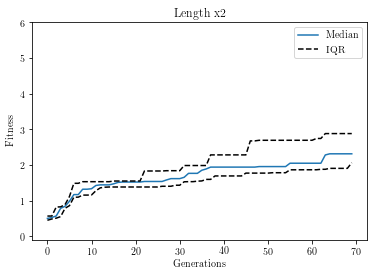

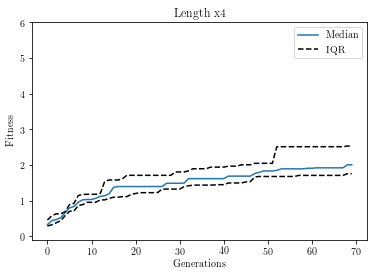

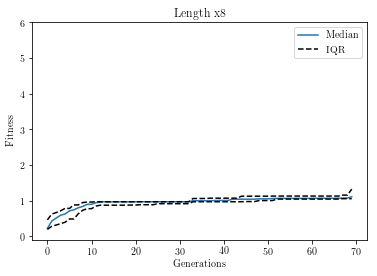

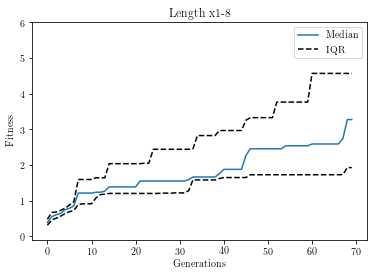

In [6]:
df = pd.DataFrame(columns=range(0,70))
folders = ['1','2','4','8','1-8']             
for k in range(0,len(folders)):
    fig = plt.figure()
    ax1 = fig.gca()
    evolBest = []
    for i in range(0,10):
        evolBest.clear()
    
        csv_file = open('./filesFromLenghtExperiment/'+folders[k]+'xL/'+str(i+1)+'/log/evolution.txt')
        csv_reader = csv.reader(csv_file,delimiter='-')
        line_count = 0
        for row in csv_reader:
            #evolutionAvr.append(float(row[2]))
            evolBest.append(float(row[1]))
            line_count =line_count + 1
            #print(line_count)
            #print(evolBest)
            if line_count >= 70:
                break
        #evolutionAvrs.append(evolutionAvr[:])
        df.loc[i] = evolBest[:]

    #ax1.plot(df.min(),label='Best')
    #ax1.plot(df.max(),label='Worst')
    x = range(70)
    q3 = df.quantile(0.75)
    uperr = q3- df.median()
    q1 = df.quantile(0.25)
    lowerr = df.median()-q1
    ax1.plot(x,df.median(),label='Median')
    ax1.plot(x,q3,label='IQR', color='k', linestyle='--')
    ax1.plot(x,q1, color='k', linestyle='--',label='_nolegend_')
    #ax1.errorbar(x,df.median(), yerr=[lowerr,uperr], capsize=4,  errorevery=15,label='Median')

    #plt.axhline(y=0.3, color='k', linestyle='-.')
    ax1.set_ylim(-0.1,6)
    ax1.legend()
    ax1.set_title('Length x'+folders[k])
    #ax1.set_xticks([0,100,200,300])
    #ax1.set_xticklabels(['0','3000','6000','9000'])
    ax1.set_xlabel('Generations')
    ax1.set_ylabel('Fitness')
    #plt.savefig('CPGGenDEOne.eps',bbox_inches="tight")
    plt.show()

# All nModules

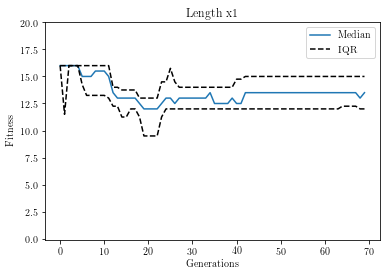

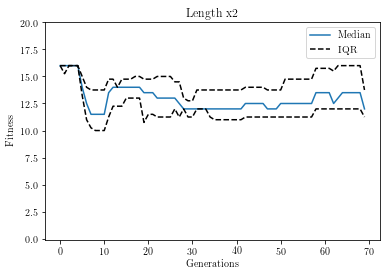

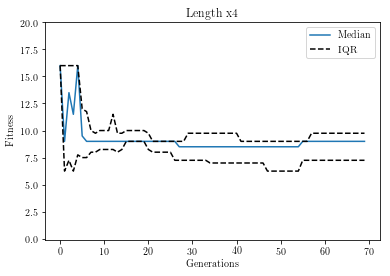

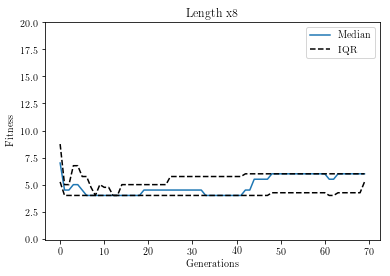

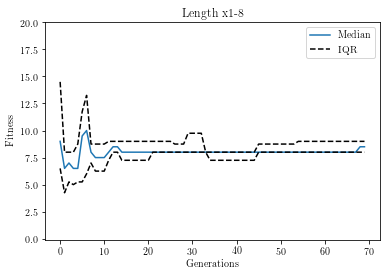

In [4]:
#df = pd.DataFrame(columns=range(0,300))
df = pd.DataFrame(columns=range(0,70))
folders = ['1','2','4','8','1-8']             
#evolutionAvrs = []
#evolutionAvr = []
for k in range(0,len(folders)):
    fig = plt.figure()
    ax1 = fig.gca()
    evolBest = []
    for i in range(0,10):
        evolBest.clear()
    
        csv_file = open('./filesFromLenghtExperiment/'+folders[k]+'xL/'+str(i+1)+'/log/bestFeatures.txt')
        csv_reader = csv.reader(csv_file,delimiter='-')
        line_count = 0
        for row in csv_reader:
            #evolutionAvr.append(float(row[2]))
            evolBest.append(float(row[2]))
            line_count =line_count + 1
            #print(line_count)
            #print(evolBest)
            if line_count >= 70:
                break
        #evolutionAvrs.append(evolutionAvr[:])
        df.loc[i] = evolBest[:]

    #ax1.plot(df.min(),label='Best')
    #ax1.plot(df.max(),label='Worst')
    #x = range(300)
    x = range(70)
    q3 = df.quantile(0.75)
    uperr = q3- df.median()
    q1 = df.quantile(0.25)
    lowerr = df.median()-q1
    ax1.plot(x,df.median(),label='Median')
    ax1.plot(x,q3,label='IQR', color='k', linestyle='--')
    ax1.plot(x,q1, color='k', linestyle='--',label='_nolegend_')
    #ax1.errorbar(x,df.median(), yerr=[lowerr,uperr], capsize=4,  errorevery=15,label='Median')

    #plt.axhline(y=0.3, color='k', linestyle='-.')
    ax1.set_ylim(-0.1,20)
    ax1.legend()
    ax1.set_title('Length x'+folders[k])
    #ax1.set_xticks([0,100,200,300])
    #ax1.set_xticklabels(['0','3000','6000','9000'])
    #ax1.set_xticks([0,100,200])
    #ax1.set_xticklabels(['0','3000','6000'])
    ax1.set_xlabel('Generations')
    ax1.set_ylabel('Fitness')
    #plt.savefig('CPGGenDEOne.eps',bbox_inches="tight")
    plt.show()

# All Broken Connections

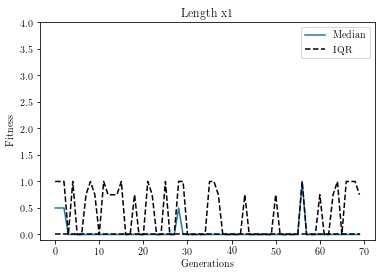

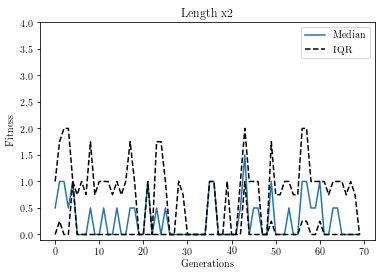

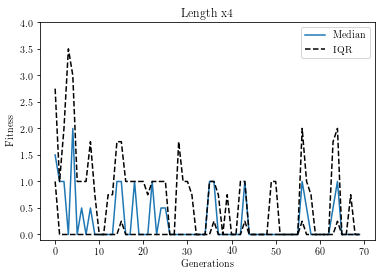

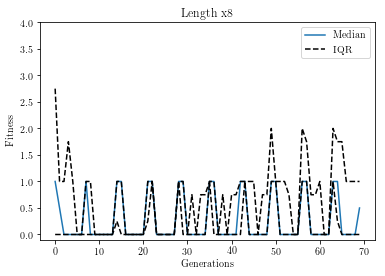

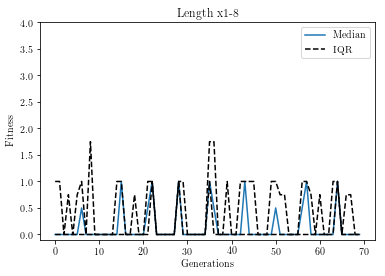

In [5]:
#df = pd.DataFrame(columns=range(0,300))
df = pd.DataFrame(columns=range(0,70))
folders = ['1','2','4','8','1-8']             
#evolutionAvrs = []
#evolutionAvr = []
for k in range(0,len(folders)):
    fig = plt.figure()
    ax1 = fig.gca()
    evolBest = []
    for i in range(0,10):
        evolBest.clear()
    
        csv_file = open('./filesFromLenghtExperiment/'+folders[k]+'xL/'+str(i+1)+'/log/bestFeatures.txt')
        csv_reader = csv.reader(csv_file,delimiter='-')
        line_count = 0
        for row in csv_reader:
            #evolutionAvr.append(float(row[2]))
            evolBest.append(float(row[9]))
            line_count =line_count + 1
            #print(line_count)
            #print(evolBest)
            if line_count >= 70:
                break
        #evolutionAvrs.append(evolutionAvr[:])
        df.loc[i] = evolBest[:]

    #ax1.plot(df.min(),label='Best')
    #ax1.plot(df.max(),label='Worst')
    #x = range(300)
    x = range(70)
    q3 = df.quantile(0.75)
    uperr = q3- df.median()
    q1 = df.quantile(0.25)
    lowerr = df.median()-q1
    ax1.plot(x,df.median(),label='Median')
    ax1.plot(x,q3,label='IQR', color='k', linestyle='--')
    ax1.plot(x,q1, color='k', linestyle='--',label='_nolegend_')
    #ax1.errorbar(x,df.median(), yerr=[lowerr,uperr], capsize=4,  errorevery=15,label='Median')

    #plt.axhline(y=0.3, color='k', linestyle='-.')
    ax1.set_ylim(-0.1,4)
    ax1.legend()
    ax1.set_title('Length x'+folders[k])
    #ax1.set_xticks([0,100,200,300])
    #ax1.set_xticklabels(['0','3000','6000','9000'])
    #ax1.set_xticks([0,100,200])
    #ax1.set_xticklabels(['0','3000','6000'])
    ax1.set_xlabel('Generations')
    ax1.set_ylabel('Fitness')
    #plt.savefig('CPGGenDEOne.eps',bbox_inches="tight")
    plt.show()